In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
dataset_path = "../dataset_output/libras_minds/libras_minds_openpose_80_frames_augmented.csv"
output_path = "../dataset_output/libras_minds/imgs/"

In [3]:
train = pd.read_csv(dataset_path)

In [4]:
train = train.drop("Unnamed: 0", axis=1)

In [5]:
train

,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,hand_0_2_x,...,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face,person
0,Acontecer,01AcontecerSinalizador01-1.mp4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,False,False,1
1,Acontecer,01AcontecerSinalizador01-1.mp4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,False,False,1
2,Acontecer,01AcontecerSinalizador01-1.mp4,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,True,False,1
3,Acontecer,01AcontecerSinalizador01-1.mp4,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,True,False,1
4,Acontecer,01AcontecerSinalizador01-1.mp4,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240475,Vontade,augmented3-20VontadeSinalizador04-1.mp4,156,0.661128,0.869466,0.093740,0.648234,0.894273,0.206741,0.640855,...,0.0,-0.047766,0.008831,0.0,-0.047766,0.008831,0.0,False,False,4
240476,Vontade,augmented3-20VontadeSinalizador04-1.mp4,157,0.654486,0.885906,0.132987,0.640599,0.896898,0.282548,0.636257,...,0.0,-0.047766,0.008831,0.0,-0.047766,0.008831,0.0,False,False,4
240477,Vontade,augmented3-20VontadeSinalizador04-1.mp4,158,0.654151,0.895033,0.114622,0.638526,0.901083,0.239837,0.636232,...,0.0,-0.047766,0.008831,0.0,-0.047766,0.008831,0.0,False,False,4
240478,Vontade,augmented3-20VontadeSinalizador04-1.mp4,159,0.655912,0.890127,0.152973,0.643040,0.901179,0.265749,0.638438,...,0.0,-0.047766,0.008831,0.0,-0.047766,0.008831,0.0,False,False,4


In [6]:
train["category"].value_counts()

category
Barulho       12640
Acontecer     12480
Vacina        12480
Sapo          12480
Ruim          12480
Maca          12480
Espelho       12480
Vontade       12480
Banco         12480
Bala          12480
Aproveitar    12480
Filho         11520
Banheiro      11440
Cinco         11440
Aluno         11440
Esquina       11440
Medo          11440
America       11440
Amarelo       11440
Conhecer      11440
Name: count, dtype: int64

In [7]:
signs = list(train.columns)

In [8]:
signs = [s for s in signs if s.endswith("_x") or s.endswith("_y")]
# signs = [s for s in signs if s.startswith("hand_")]

In [9]:
signs

['hand_0_0_x',
 'hand_0_0_y',
 'hand_0_1_x',
 'hand_0_1_y',
 'hand_0_2_x',
 'hand_0_2_y',
 'hand_0_3_x',
 'hand_0_3_y',
 'hand_0_4_x',
 'hand_0_4_y',
 'hand_0_5_x',
 'hand_0_5_y',
 'hand_0_6_x',
 'hand_0_6_y',
 'hand_0_7_x',
 'hand_0_7_y',
 'hand_0_8_x',
 'hand_0_8_y',
 'hand_0_9_x',
 'hand_0_9_y',
 'hand_0_10_x',
 'hand_0_10_y',
 'hand_0_11_x',
 'hand_0_11_y',
 'hand_0_12_x',
 'hand_0_12_y',
 'hand_0_13_x',
 'hand_0_13_y',
 'hand_0_14_x',
 'hand_0_14_y',
 'hand_0_15_x',
 'hand_0_15_y',
 'hand_0_16_x',
 'hand_0_16_y',
 'hand_0_17_x',
 'hand_0_17_y',
 'hand_0_18_x',
 'hand_0_18_y',
 'hand_0_19_x',
 'hand_0_19_y',
 'hand_0_20_x',
 'hand_0_20_y',
 'hand_1_0_x',
 'hand_1_0_y',
 'hand_1_1_x',
 'hand_1_1_y',
 'hand_1_2_x',
 'hand_1_2_y',
 'hand_1_3_x',
 'hand_1_3_y',
 'hand_1_4_x',
 'hand_1_4_y',
 'hand_1_5_x',
 'hand_1_5_y',
 'hand_1_6_x',
 'hand_1_6_y',
 'hand_1_7_x',
 'hand_1_7_y',
 'hand_1_8_x',
 'hand_1_8_y',
 'hand_1_9_x',
 'hand_1_9_y',
 'hand_1_10_x',
 'hand_1_10_y',
 'hand_1_11_x',


In [10]:
excluded_body_landmarks = [10, 11, 13, 14, 19, 20, 21, 22, 23, 24]
excluded_body_landmarks = tuple([f"pose_{i}" for i in excluded_body_landmarks])
unwanted_pose_columns = [i for i in list(signs) if i.startswith(excluded_body_landmarks)]

In [11]:
signs = [s for s in signs if s not in unwanted_pose_columns]

In [12]:
columns = ["category", "video_name", "person", "frame"] + signs

In [13]:
df_signs = train[columns]

In [14]:
df_signs

,category,video_name,person,frame,hand_0_0_x,hand_0_0_y,hand_0_1_x,hand_0_1_y,hand_0_2_x,hand_0_2_y,...,pose_12_x,pose_12_y,pose_15_x,pose_15_y,pose_16_x,pose_16_y,pose_17_x,pose_17_y,pose_18_x,pose_18_y
0,Acontecer,01AcontecerSinalizador01-1.mp4,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.506096,0.349255,0.544429,0.346600,0.472405,0.371123,0.565930,0.376460
1,Acontecer,01AcontecerSinalizador01-1.mp4,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.506101,0.349257,0.544417,0.349249,0.472410,0.368418,0.565933,0.373837
2,Acontecer,01AcontecerSinalizador01-1.mp4,1,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.506125,0.349282,0.544411,0.349321,0.472426,0.368356,0.565936,0.376446
3,Acontecer,01AcontecerSinalizador01-1.mp4,1,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.506086,0.349238,0.544389,0.346542,0.472397,0.368407,0.565933,0.376503
4,Acontecer,01AcontecerSinalizador01-1.mp4,1,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.506081,0.346585,0.544401,0.343914,0.472429,0.371133,0.565908,0.376575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240475,Vontade,augmented3-20VontadeSinalizador04-1.mp4,4,156,0.661128,0.869466,0.648234,0.894273,0.640855,0.922994,...,0.601915,0.865638,0.493997,0.182787,0.527830,0.180992,0.470245,0.211028,0.559348,0.203447
240476,Vontade,augmented3-20VontadeSinalizador04-1.mp4,4,157,0.654486,0.885906,0.640599,0.896898,0.636257,0.924870,...,0.600056,0.862746,0.494000,0.182767,0.529472,0.180907,0.471686,0.208156,0.559382,0.203403
240477,Vontade,augmented3-20VontadeSinalizador04-1.mp4,4,158,0.654151,0.895033,0.638526,0.901083,0.636232,0.925334,...,0.600223,0.865739,0.494016,0.182717,0.529505,0.180879,0.471695,0.208140,0.559413,0.203430
240478,Vontade,augmented3-20VontadeSinalizador04-1.mp4,4,159,0.655912,0.890127,0.643040,0.901179,0.638438,0.925310,...,0.600116,0.862762,0.494026,0.182693,0.531126,0.180796,0.471688,0.208149,0.559398,0.203398


In [15]:
frames = 80

In [17]:
people = df_signs["person"].unique()
validate_people = people[-2:]
test_people = people[-4:-2]
train_people = people[:-4]

In [18]:
def get_dataset_path(person):
    if person in train_people:
        return "train"
    if person in test_people:
        return "test"
    return "validate"

In [19]:
def reshape_features_dataset(features):
    return features.reshape((int(features.shape[0]/frames), frames, features.shape[1]))

def reshape_target_dataset(target):
    return target.reshape((int(target.shape[0]/frames), frames))[:, 0]

In [20]:
def get_axis_df(df, axis):
    return df[[c for c in signs if c.endswith(axis)]]

In [21]:
def normalize_landmark_name(name):
    splited_name = name.split("-")
    landmark_name = splited_name[1]
    landmark_number = splited_name[2].rjust(3, "0")
    return f"{landmark_name}-{landmark_number}"

In [22]:
def create_folder(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [23]:
def landmarks_to_image(x, y, n=3, normalize=False):
    # Remove cols until the width is multiple of n
    width = x.shape[1]
    if width % n != 0:
        extra_cols = width % n
        x = x[:, : width - extra_cols]
        y = y[:, : width - extra_cols]

    X = np.reshape(x, (x.shape[0], -1, n))
    Y = np.reshape(y, (y.shape[0], -1, n))
    I = np.concatenate([X, Y], axis=1)
    return I

In [24]:
def normalize_axis(axis):
    axis[axis < 0] = 0
    axis[axis > 1] = 1
    return axis

In [25]:
videos = df_signs["video_name"].unique()
print(len(videos))
videos

2702


array(['01AcontecerSinalizador01-1.mp4', '01AcontecerSinalizador01-2.mp4',
       '01AcontecerSinalizador01-3.mp4', ...,
       'augmented3-20VontadeSinalizador01-2.mp4',
       'augmented3-20VontadeSinalizador01-3.mp4',
       'augmented3-20VontadeSinalizador04-1.mp4'], dtype=object)

In [31]:
total_videos = len(videos)
current_video = 0
for video in videos:
    current_video += 1
    if current_video % 500 == 0:
        print("Current Video:", current_video, "of", total_videos)
    df_video = df_signs[df_signs["video_name"] == video].sort_values("frame")
    category = df_video.iloc[0]["category"]
    person = df_video.iloc[0]["person"]
    if len(video) > frames:
        print("Video > frames")
        break
    if video.startswith("augmented") and person not in train_people:
        continue
    df = df_video.drop(["category", "video_name", "frame"], axis=1)
    x = get_axis_df(df, "x")
    y = get_axis_df(df, "y")
    x = x.T.to_numpy()
    y = y.T.to_numpy()
    x = normalize_axis(x)
    y = normalize_axis(y)
    image = landmarks_to_image(x, y)
    save_path = os.path.join(output_path, get_dataset_path(person), str(category), f"{video}.png")
    create_folder(os.path.join(output_path, get_dataset_path(person), str(category)))
    try:
        plt.imsave(save_path, image)
    except:
        print("Error saving", save_path)

Current Video: 500 of 2702
Current Video: 1000 of 2702
Current Video: 1500 of 2702
Current Video: 2000 of 2702
Current Video: 2500 of 2702


In [46]:
total_videos = len(df_signs)
current_video = 0
for i in df_signs.iterrows():
    current_video += 1
    if current_video % 500 == 0:
        print("Current Video:", current_video, "of", total_videos)
    row = i[1]
    df = pd.read_parquet(base_path + row["path"])
    df = df[df["type"].isin(["left_hand", "right_hand"])]
    df["landmark"] = df["row_id"].apply(lambda i: normalize_landmark_name(i))
    df = df.sort_values("landmark")
    x = get_axis_df(df, "x")
    y = get_axis_df(df, "y")
    x = x.to_numpy()
    y = y.to_numpy()
    x = normalize_axis(x)
    y = normalize_axis(y)
    image = landmarks_to_image(x, y)
    save_path = os.path.join(output_path, row["sign"], f"{row['participant_id']}-{row['sequence_id']}.png")
    create_folder(os.path.join(output_path, row["sign"]))
    try:
        plt.imsave(save_path, image)
    except:
        print("Error saving", save_path)

NameError: name 'base_path' is not defined

In [163]:
row

path              train_landmark_files/32319/2093201419.parquet
participant_id                                            32319
sequence_id                                          2093201419
sign                                                        not
Name: 26477, dtype: object

In [130]:
row

path              train_landmark_files/26734/1000035562.parquet
participant_id                                            26734
sequence_id                                          1000035562
sign                                                       blow
Name: 0, dtype: object

In [122]:
X = np.array_split(x, x.shape[1] // 3, axis=1)
X = np.stack(X, axis=1)
Y = np.array_split(y, y.shape[1] // 3, axis=1)
Y = np.stack(Y, axis=1)
X.shape

ValueError: all input arrays must have the same shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


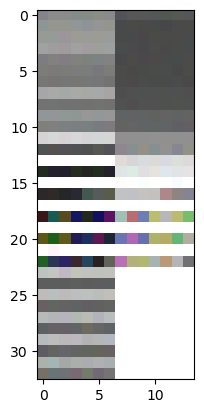

In [128]:
plt.imshow(landmarks_to_image(x, y))

In [97]:
x = df.copy()
x["landmark"] = df["row_id"].apply(lambda i: "-".join(i.split("-")[1:]))
x_values = {}
for l in x["landmark"].unique():
    x_values[l] = x[x["landmark"] == l]["x"].values
x_values
pd.DataFrame.from_dict(x_values).T
# x = x[["landmark", "x"]]
# x = pd.melt(x[["landmark", "x"]], id_vars=['landmark'], value_vars=['x'])
# x = x.set_index("landmark")
# x["x"].values.reshape(())

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
face-0,0.494400,0.501150,0.498471,0.506406,0.507809,0.512282,0.519686,0.526654,0.534279,0.537974,...,0.539496,0.540863,0.539631,0.538870,0.537460,0.538041,0.536197,0.535788,0.535696,0.536416
face-1,0.496017,0.492906,0.491770,0.496547,0.502923,0.505973,0.511610,0.515489,0.524356,0.534715,...,0.540774,0.541330,0.541150,0.540376,0.539333,0.538957,0.537321,0.537178,0.535058,0.535971
face-2,0.500818,0.498327,0.497680,0.502239,0.508405,0.512122,0.517218,0.519985,0.527824,0.537330,...,0.542549,0.543044,0.542850,0.542128,0.541073,0.540639,0.539162,0.538990,0.537231,0.537866
face-3,0.489788,0.487708,0.487321,0.491887,0.498103,0.502142,0.508275,0.512669,0.520244,0.529460,...,0.535133,0.535540,0.535418,0.534454,0.533305,0.532867,0.531290,0.530816,0.528941,0.529734
face-4,0.495304,0.492322,0.491236,0.496049,0.502395,0.505442,0.511242,0.515550,0.524563,0.534917,...,0.541114,0.541668,0.541508,0.540682,0.539613,0.539233,0.537561,0.537360,0.535184,0.536143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
right_hand-16,0.422241,0.440972,0.460872,0.467546,0.473871,0.473521,0.445551,0.401285,0.320296,0.217971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001660
right_hand-17,0.282980,0.304759,0.321579,0.326890,0.337585,0.325513,0.305635,0.272736,0.233316,0.185122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042694
right_hand-18,0.313736,0.335886,0.358558,0.365960,0.372476,0.352425,0.326248,0.282339,0.221445,0.150808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006723
right_hand-19,0.350728,0.377429,0.400531,0.403416,0.414791,0.390784,0.352488,0.299400,0.220874,0.132357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014755


In [58]:
df[df["type"] == "pose"].sort_values("row_id")

,frame,row_id,type,landmark_index,x,y,z
489,20,20-pose-0,pose,0,0.524597,0.329134,-0.976228
490,20,20-pose-1,pose,1,0.566472,0.284107,-0.913417
499,20,20-pose-10,pose,10,0.482853,0.377581,-0.780198
500,20,20-pose-11,pose,11,0.830147,0.563290,-0.303732
501,20,20-pose-12,pose,12,0.312736,0.523624,-0.185898
...,...,...,...,...,...,...,...
12440,42,42-pose-5,pose,5,0.487127,0.295725,-0.969664
12441,42,42-pose-6,pose,6,0.467742,0.296605,-0.969754
12442,42,42-pose-7,pose,7,0.664733,0.318926,-0.587208
12443,42,42-pose-8,pose,8,0.449085,0.320256,-0.447975


In [57]:
df["type"].value_counts()

face          10764
pose            759
left_hand       483
right_hand      483
Name: type, dtype: int64